<a href="https://colab.research.google.com/github/Durga-Sowjanya-Sanku/Digits-Classification/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello World..")

Hello World..


In [2]:
import tensorflow
from tensorflow import keras
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.datasets import fashion_mnist
Data = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
len(Data)

2

In [5]:
Train,Test = Data

In [6]:
len(Train)

2

In [7]:
X_train,Y_train = Train

In [8]:
X_test,Y_test = Test

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
Y_train.shape

(60000,)

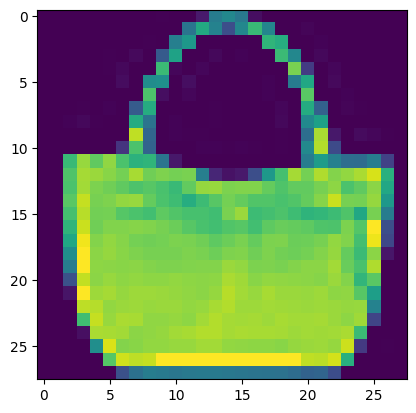

In [11]:
plt.imshow(X_train[100])

In [12]:
Y_test.shape

(10000,)

In [13]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

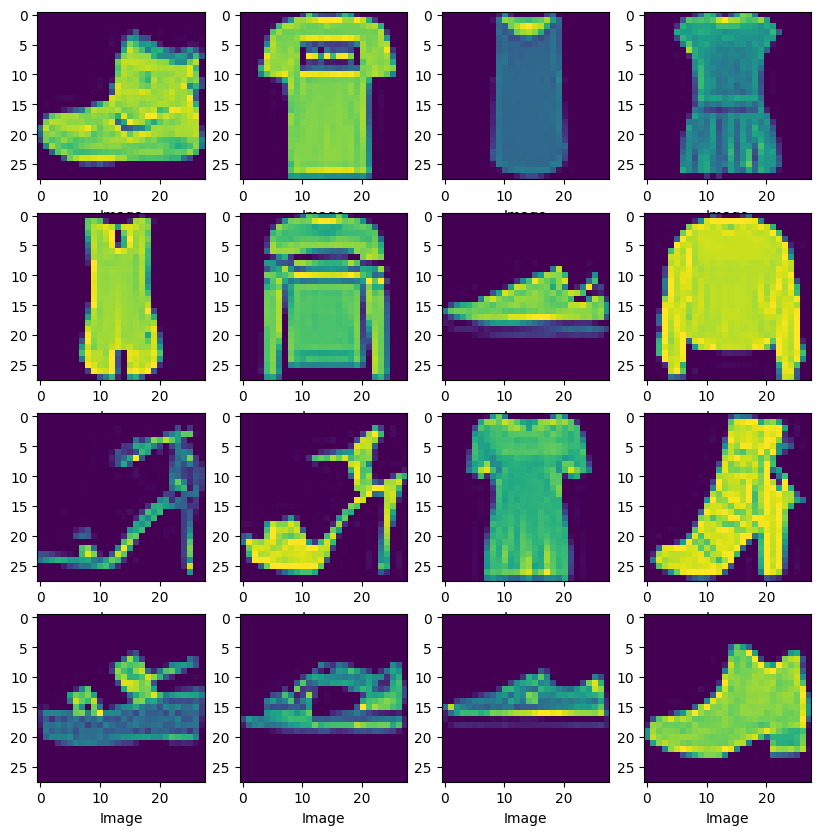

In [14]:
fig,ax = plt.subplots(figsize=(10,10),nrows=4,ncols=4)
c = 0
for i in range(0,4):
  for j in range(0,4):
    ax[i][j].imshow(X_train[c])
    ax[i][j].set_xlabel("Image")
    c = c+1

In [15]:
# Reshaping the images of X_train
X_train = X_train.reshape(-1,28*28)
X_train.shape, X_train[0].shape

((60000, 784), (784,))

In [16]:
# Reshaping the images of X_test
X_test = X_test.reshape(-1,28*28)
X_test.shape, X_test[0].shape


((10000, 784), (784,))

In [17]:
print("Time to create the model..!")

Time to create the model..!


In [18]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()

In [19]:
model.add(
    Dense(units = 512, input_shape=(784,), activation='relu')
)
model.add(
    Dense(units=256,activation='relu')
)
model.add(
    Dense(units=128, activation='relu')
)
model.add(
    Dense(units=64,activation='relu')
)
model.add(
    Dense(units=10,activation='softmax')
)

In [20]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(X_train,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 15s 4ms/step - loss: 1.2465 - accuracy: 0.7740 - val_loss: 0.5064 - val_accuracy: 0.8267
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4686 - accuracy: 0.8330 - val_loss: 0.4555 - val_accuracy: 0.8413
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4203 - accuracy: 0.8510 - val_loss: 0.4176 - val_accuracy: 0.8546
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4023 - accuracy: 0.8560 - val_loss: 0.3656 - val_accuracy: 0.8696
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3824 - accuracy: 0.8634 - val_loss: 0.4132 - val_accuracy: 0.8609
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3675 - accuracy: 0.8674 - val_loss: 0.4468 - val_accuracy: 0.8552
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3502 - accuracy: 0.8737 - val_loss: 0.3574 - val_accuracy

In [23]:
model_loss,model_accuracy = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8583


In [24]:
model_loss

0.4120872914791107

In [25]:
model_accuracy

0.858299970626831

In [27]:
Predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [28]:
Predictions.shape

(10000, 10)

In [31]:
import numpy as np
Predictions = np.argmax(Predictions,axis=1)

In [33]:
Predictions.shape

(10000,)

In [35]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test,Predictions)
mat

array([[791,   2,   8,  46,   6,   1, 136,   0,  10,   0],
       [  3, 962,   2,  23,   7,   0,   2,   0,   1,   0],
       [ 15,   0, 633,  17, 257,   1,  72,   0,   5,   0],
       [ 22,   4,   9, 878,  59,   0,  24,   0,   4,   0],
       [  1,   0,  38,  26, 899,   1,  34,   0,   1,   0],
       [  0,   0,   0,   0,   0, 961,   0,  28,   1,  10],
       [145,   0,  49,  38, 151,   0, 605,   0,  12,   0],
       [  0,   0,   0,   0,   0,  19,   0, 927,   0,  54],
       [  1,   0,   2,   5,   9,   5,   4,   6, 968,   0],
       [  0,   0,   0,   0,   0,  14,   1,  26,   0, 959]])

<Axes: >

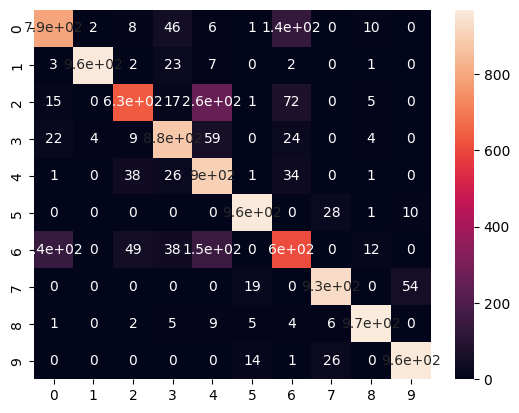

In [41]:
import seaborn
from seaborn import heatmap
heatmap(mat,annot=True)

In [26]:
print("That's the end...!")

That's the end...!
